# PCA eigenface

## Olivetti 데이터

In [141]:
# 1) 데이터셋 로드: Olivetti 얼굴 데이터셋을 불러옵니다 (첫 실행 시 다운로드됨)
from sklearn.datasets import fetch_olivetti_faces
faces_all = fetch_olivetti_faces()

In [142]:
# (이미지 순서 A) 데이터셋 설명 출력: 원본 코드 이미지 순서대로 DESCR을 먼저 확인합니다.
# 이 셀은 fetch 바로 다음에 두어 설명을 먼저 확인할 수 있게 합니다.
print(faces_all.DESCR[:1000])


.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

In [143]:
# 2) 데이터셋 정보 출력: 설명 일부와 이미지/대상 수를 확인합니다.
# (분리된 셀) 데이터셋의 요약 정보를 출력합니다.
import numpy as np

print("There are " + str(len(faces_all.images)) + " images in the dataset")
print("There are " + str(len(np.unique(faces_all.target))) + " unique targets in the dataset")
print("unique target number: " + str(np.unique(faces_all.target)))


There are 400 images in the dataset
There are 40 unique targets in the dataset
unique target number: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [144]:
# 3) 시각화 헬퍼 정의 (분리된 셀)
# (이 셀은 호출 셀 앞에 오도록 삽입합니다 — 호출 셀은 이미 삽입되어 있으므로 최종 순서가 print -> helper -> call이 됩니다.)
import matplotlib.pyplot as plt

def show_40_distinct_people(images, unique_ids):
    """
    images: array-like of shape (n_samples, height, width)
    unique_ids: iterable of subject ids (expect 40)
    각 피험자마다 index*10 위치의 이미지를 선택하여 표시합니다.
    """
    fig, axarr = plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    axarr = axarr.flatten()
    for i, unique_id in enumerate(unique_ids):
        image_index = unique_id * 10  # Olivetti는 피험자별로 10장의 이미지가 연속 저장됩니다.
        axarr[i].imshow(images[image_index], cmap="gray")
        axarr[i].set_xticks([])
        axarr[i].set_yticks([])
        axarr[i].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")
    plt.tight_layout()
    plt.show()


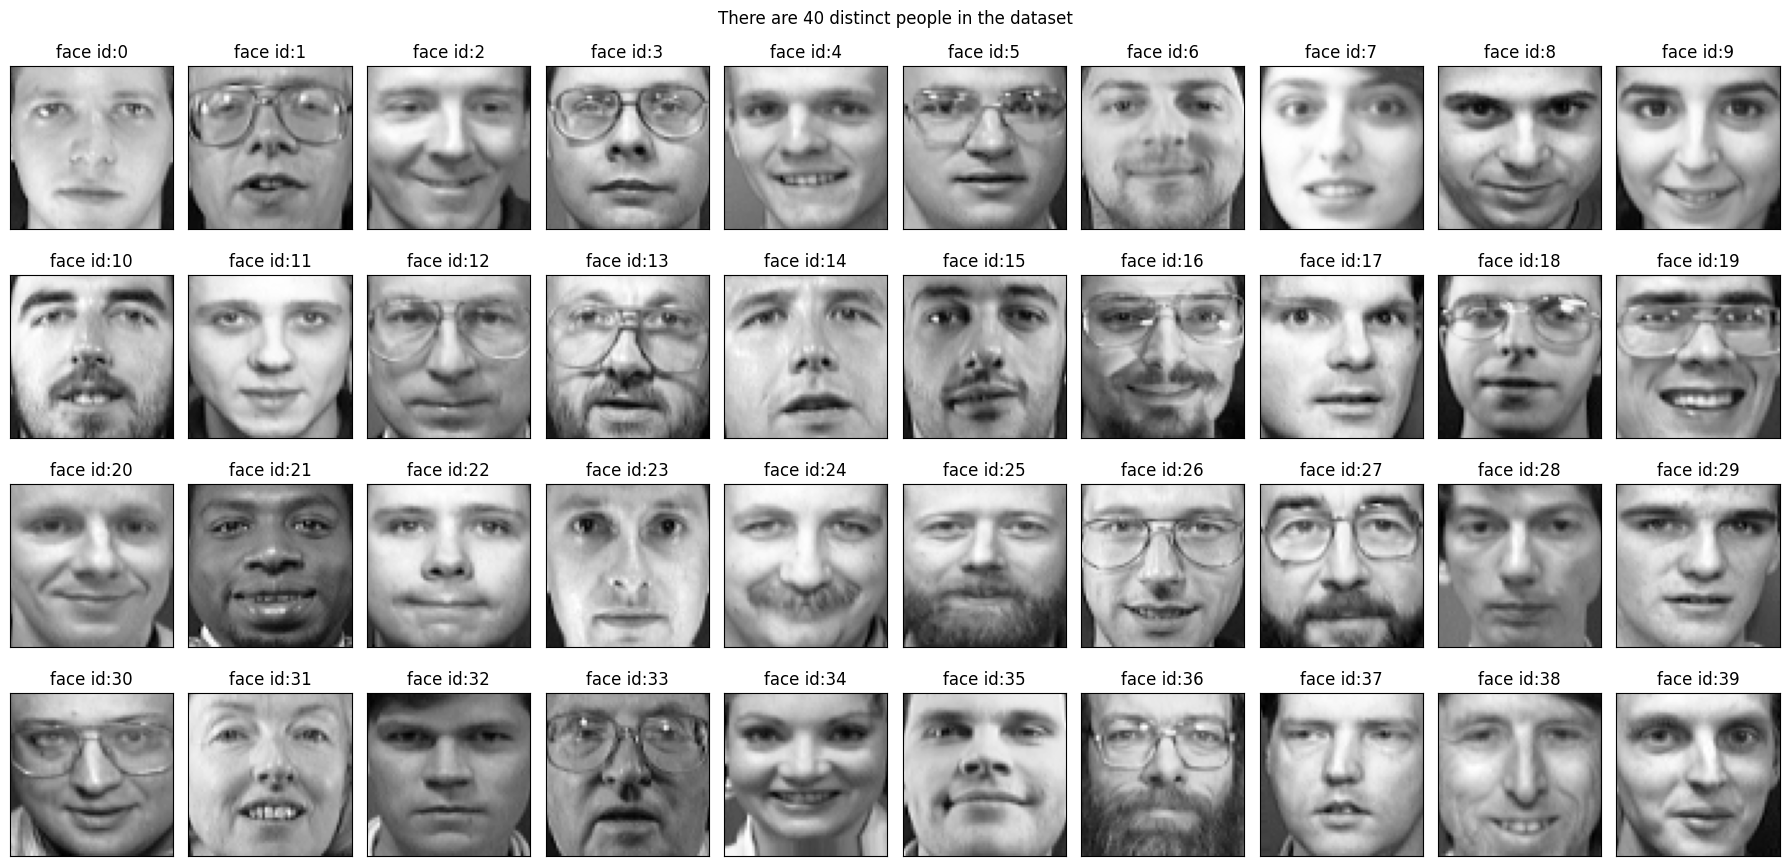

In [145]:
# 호출(분리된 셀): 전체 40명 표시 호출 부분
# (이 셀은 helper 정의 뒤에 위치하도록 최종 순서가 A:print, B:helper, C:call이 되도록 삽입됩니다)
unique_ids = np.unique(faces_all.target)
show_40_distinct_people(faces_all.images, unique_ids)


In [146]:
# K 선택 셀: 분석할 피험자 ID를 설정합니다 (0..39).
# 이 셀을 실행한 뒤에 PCA/재구성 셀을 실행하세요.
# 기본값을 원하는 번호로 바꾸면 됩니다.
K = 7

# 선택을 더 편리하게 하려면 ipywidgets 슬라이더(옵션)를 사용해 인터랙티브하게 설정할 수 있습니다.
try:
    from ipywidgets import IntSlider, interact
    def _set_K(k):
        global K
        K = k
    interact(_set_K, k=IntSlider(min=0, max=39, step=1, value=K, description='K'))
except Exception:
    # ipywidgets가 없으면 그냥 K 값으로 진행합니다.
    pass


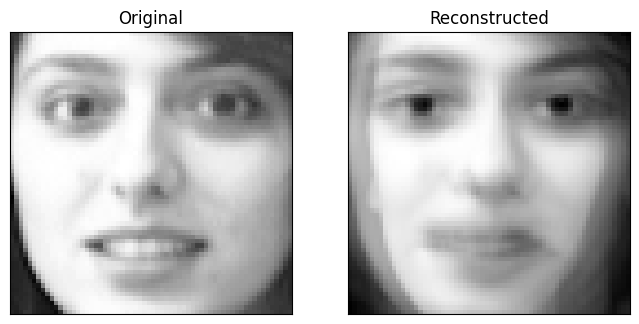

In [147]:
# (이미지 순서 C) PCA를 사용한 해당 피험자 이미지의 투영 및 역변환 (n_components=2)
from sklearn.decomposition import PCA

# X는 선택한 피험자 K의 평탄화된 데이터입니다.
X = faces_all.data[faces_all.target == K]
# PCA(구성요소 2) 적합 및 투영
pca = PCA(n_components=2)
W = pca.fit_transform(X)
# 역변환(reconstruction)
X_inv = pca.inverse_transform(W)

# 간단한 확인: 재구성된 첫 샘플과 원본 비교
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(X[0].reshape(64, 64), cmap='gray')
ax1.set_title('Original')
ax1.set_xticks([]); ax1.set_yticks([])
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(X_inv[0].reshape(64, 64), cmap='gray')
ax2.set_title('Reconstructed')
ax2.set_xticks([]); ax2.set_yticks([])
plt.show()


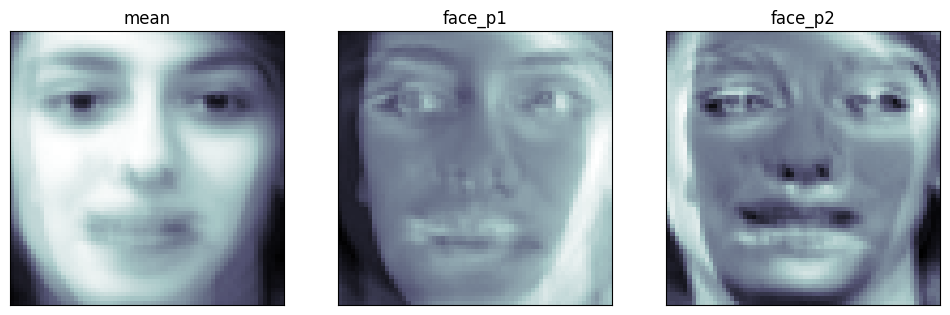

In [148]:
# (이미지 순서 D) PCA 평균 얼굴과 상위 2개 성분 시각화 (mean, component1, component2)
face_mean = pca.mean_.reshape(64, 64)
face_p1 = pca.components_[0].reshape(64, 64)
face_p2 = pca.components_[1].reshape(64, 64)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
plt.subplot(131)
plt.imshow(face_mean, plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title('mean')

plt.subplot(132)
plt.imshow(face_p1, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title('face_p1')

plt.subplot(133)
plt.imshow(face_p2, plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title('face_p2')

plt.show()


In [149]:
import numpy as np

N = 2
M = 5
W = np.linspace(-5, 10, N * M)
W

array([-5.        , -3.33333333, -1.66666667,  0.        ,  1.66666667,
        3.33333333,  5.        ,  6.66666667,  8.33333333, 10.        ])

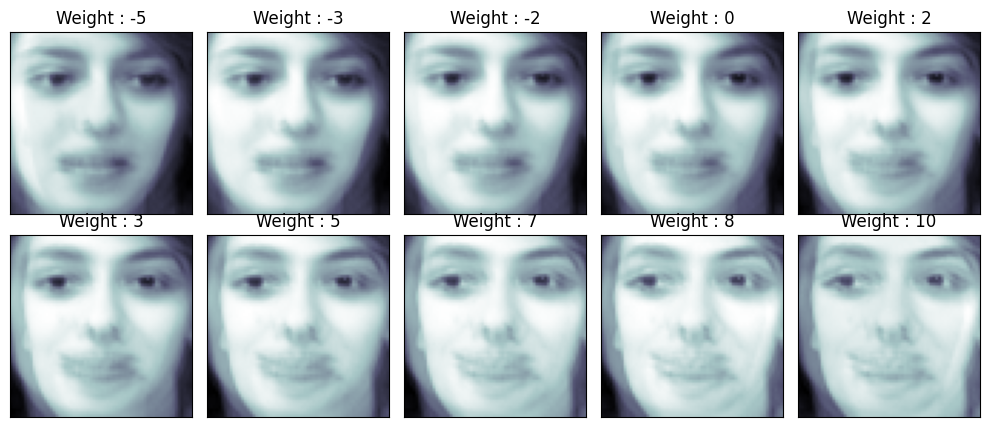

In [150]:
# 5) 주성분 가중치 변화에 따른 얼굴 시각화: 평균 얼굴에 첫 번째 주성분을 다양한 가중치로 더해봅니다.
# 이 셀은 이전에 계산한 `face_mean`과 `face_p1`을 사용합니다. (앞 셀들을 먼저 실행하세요.)
import matplotlib.pyplot as plt
import numpy as np

# 2x5 그리드로 가중치 범위를 설정합니다.
N = 2
M = 5
w = np.linspace(-5, 10, N * M)

fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for n, wi in enumerate(w):
    ax = fig.add_subplot(N, M, n + 1)
    # 평균 얼굴에 첫 번째 주성분을 가중합한 이미지 생성
    img = face_mean + wi * face_p1
    ax.imshow(img, cmap=plt.cm.bone)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Weight : ' + str(round(wi)))

plt.tight_layout()
plt.show()


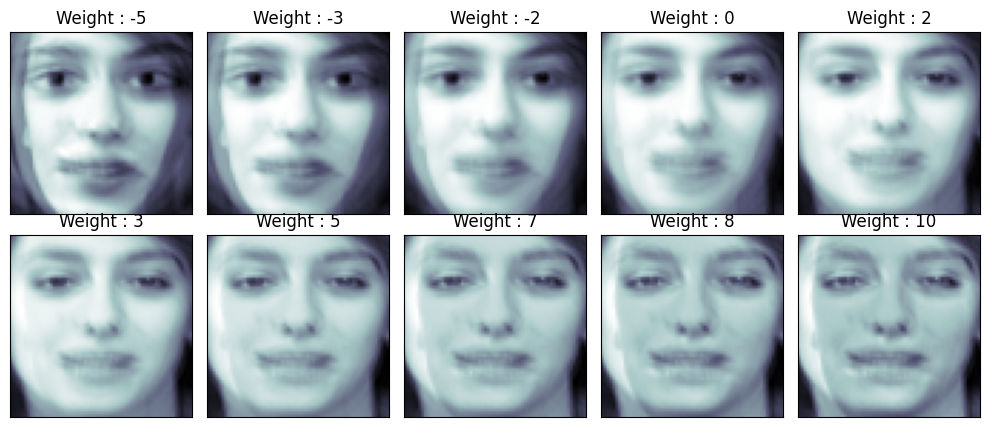

In [151]:
# 6) 두 번째 주성분에 대한 가중치 변화 시각화: mean + w * face_p2
# 이 셀도 이전에 계산한 `face_mean`과 `face_p2`를 사용합니다. (앞 셀들을 먼저 실행하세요.)
import matplotlib.pyplot as plt
import numpy as np

# 2x5 그리드로 가중치 범위를 동일하게 설정합니다.
N = 2
M = 5
w = np.linspace(-5, 10, N * M)

fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for n, wi in enumerate(w):
    ax = fig.add_subplot(N, M, n + 1)
    # 평균 얼굴에 두 번째 주성분을 가중합한 이미지 생성
    img = face_mean + wi * face_p2
    ax.imshow(img, cmap=plt.cm.bone)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Weight : ' + str(round(wi)))

plt.tight_layout()
plt.show()
